# Short-Term Labels

In [2]:
import pandas as pd

# Path to the Excel file
file_path = f'/home/klab/NAS/Analysis/AudioFacialEEG/Behavioral Labeling/Behavior_Labeling.xlsx'

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Initialize report dictionary
report = {
    'Patient': [],
    'smile_count': [],
    'sad_count': [],
    'discomfort_count': [],
    'yawn_count': [],
    'sleep_count': [],
    'non_empty_count': []
}

# Loop through each sheet except those ending in _MONITOR
for sheet_name in excel_file.sheet_names:
    if sheet_name.endswith('_MONITOR'):
        continue
    
    # Load the sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Check if 'Behavior' column exists
    if 'Behavior' not in df.columns:
        continue
    
    # Get the Behavior column (case insensitive match for 'smile', 'sad', 'discomfort', 'yawn', 'sleep')
    behavior_column = df['Behavior'].dropna().astype(str)
    
    # Count occurrences
    smile_count = behavior_column.str.contains('smile', case=False).sum()
    sad_count = behavior_column.str.contains('sad', case=False).sum()
    discomfort_count = behavior_column.str.contains('discomfort', case=False).sum()
    yawn_count = behavior_column.str.contains('yawn', case=False).sum()
    sleep_count = behavior_column.str.contains('sleep', case=False).sum()
    non_empty_count = behavior_column.shape[0]
    
    # Update report
    report['Patient'].append(sheet_name)
    report['smile_count'].append(smile_count)
    report['sad_count'].append(sad_count)
    report['discomfort_count'].append(discomfort_count)
    report['yawn_count'].append(yawn_count)
    report['sleep_count'].append(sleep_count)
    report['non_empty_count'].append(non_empty_count)

# Create a DataFrame from the report
report_df = pd.DataFrame(report)

# Display the DataFrame
from IPython.display import display
display(report_df)

,Patient,smile_count,sad_count,discomfort_count,yawn_count,sleep_count,non_empty_count
0,S20_150,300,21,80,6,19,943
1,S21_160,10,0,22,8,0,57
2,S23_199,128,10,31,27,24,308
3,S23_201,73,0,1,0,2,194
4,S23_202,2,0,11,0,0,27
5,S23_203,3,0,0,0,0,9
6,S23_205,9,0,11,0,0,54
7,S23_206,9,0,4,1,0,35
8,S23_208,2,0,2,0,0,12
9,S23_209,23,0,2,0,0,39


# Long-Term Labels

/tmp/ipykernel_6138/385047081.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')
/tmp/ipykernel_6138/385047081.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')
/tmp/ipykernel_6138/385047081.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')
/tmp/ipykernel_6138/385047081.py:39: UserWarning: Could not infer format, so each element will be parsed individually,

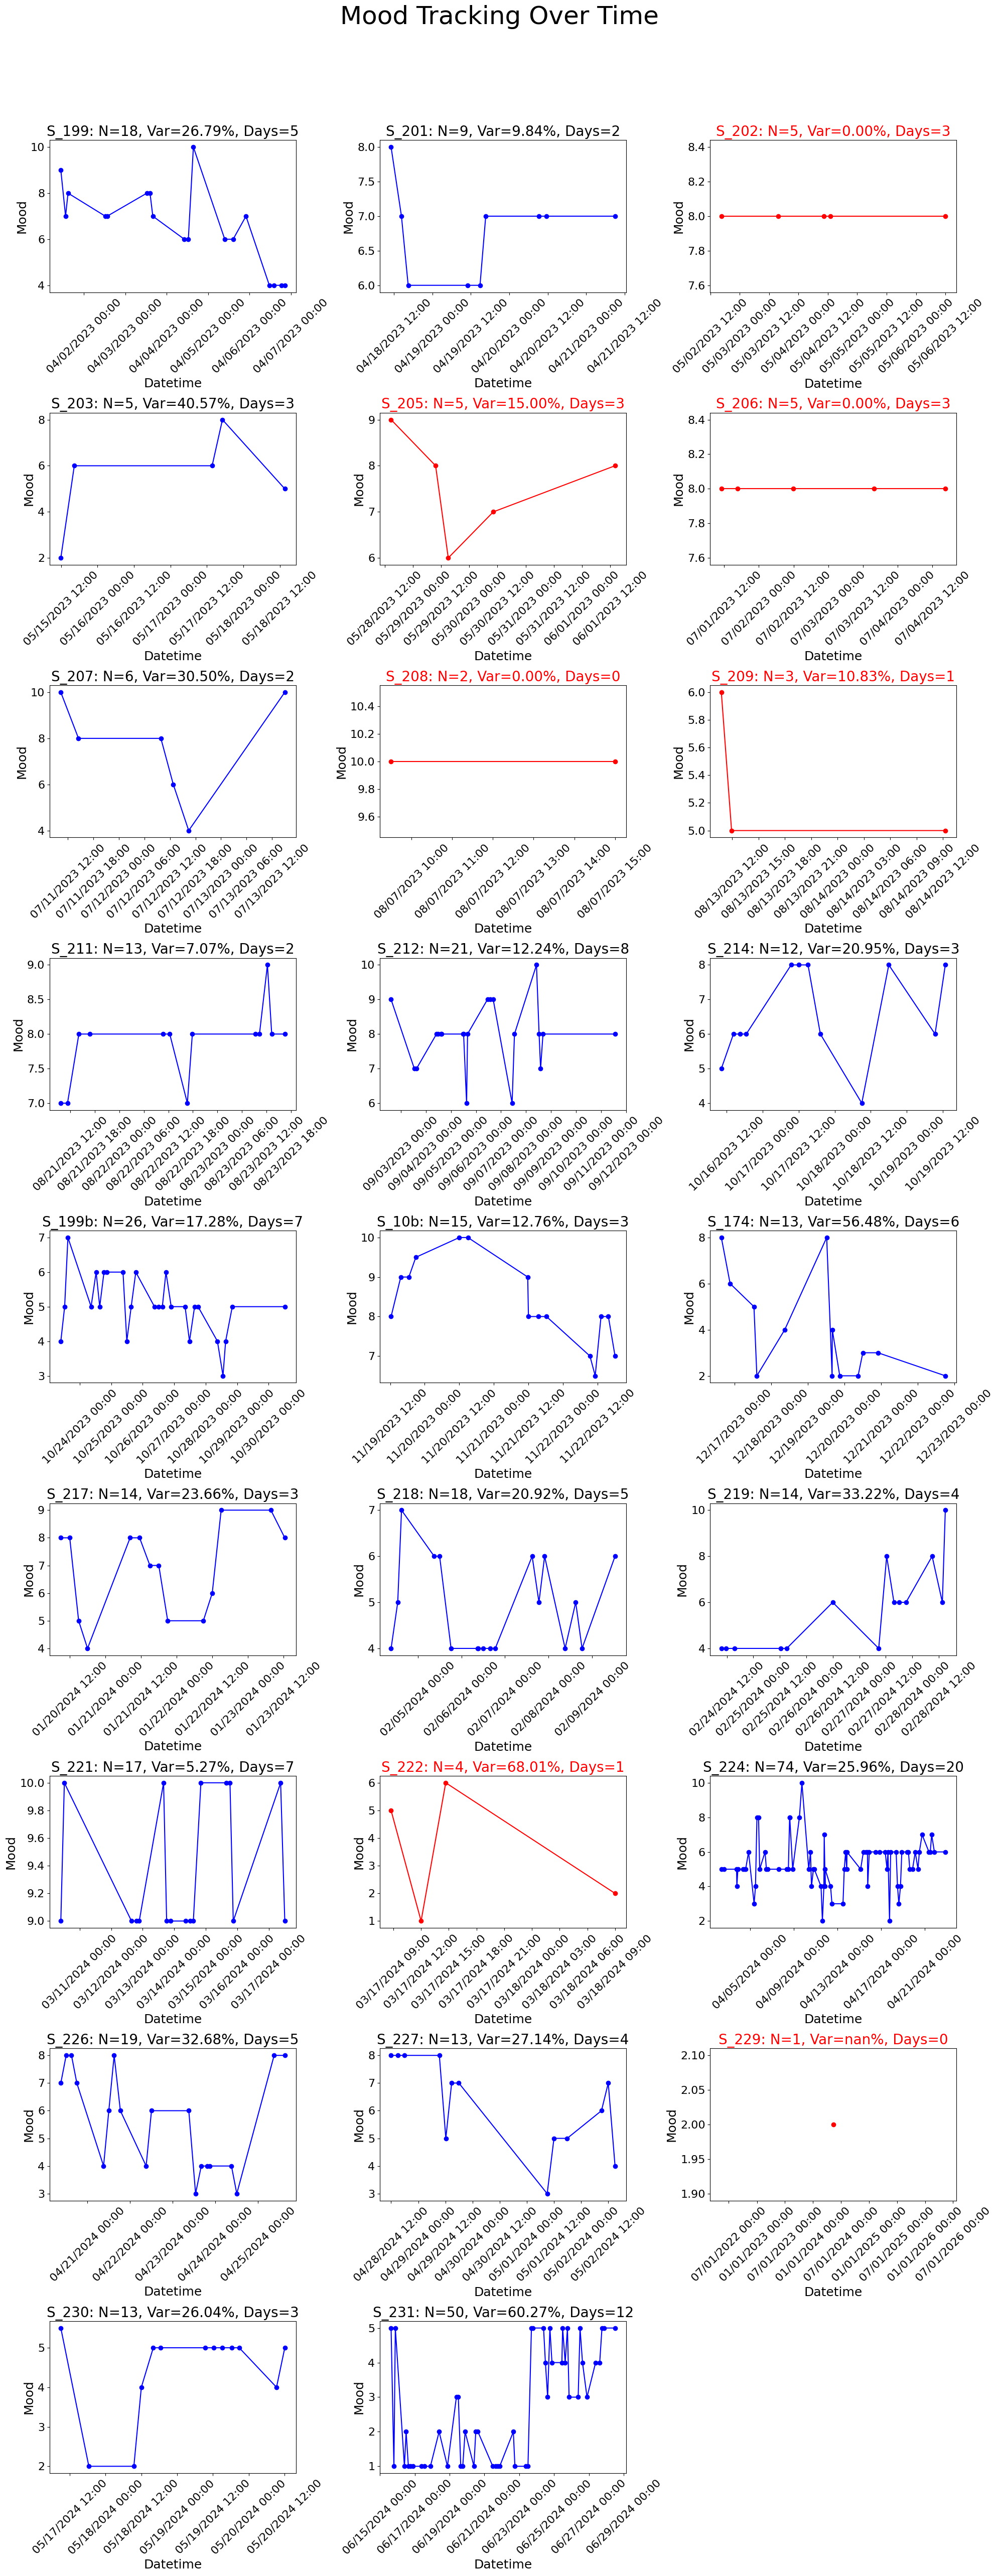

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Path to the xlsx file
MOOD_TRACKING_SHEET_PATH = f'/home/klab/NAS/Analysis/AudioFacialEEG/Behavioral Labeling/Mood_Tracking_new.xlsx'
MISC_FIGURE_PATH = f'/home/klab/NAS/Analysis/Misc_Figures/'

# Define patients with enough datapoints to be included in our analysis!
sheets_to_use = ['S_199', 'S_199b', 'S_201', 'S_203', 'S_207', 'S_10b', 'S_211', 'S_212', 'S_214', 'S_174', 
                 'S_217', 'S_218', 'S_210', 'S_219', 'S_221', 'S_224', 'S_226', 'S_227', 'S_230', 'S_231'] 

# Read the Excel file
xls = pd.ExcelFile(MOOD_TRACKING_SHEET_PATH)

# Get all sheet names that start with "S_"
sheet_names = [sheet for sheet in xls.sheet_names if sheet.startswith("S_")]



# Set up the plot grid
num_sheets = len(sheet_names)
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(num_sheets / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
fig.suptitle('Mood Tracking Over Time', fontsize=36)

# Iterate through the sheets and plot
for idx, sheet_name in enumerate(sheet_names):
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Filter rows where 'Mood' is not empty and not NaN
    df = df.dropna(subset=['Mood'])
    df = df[df['Mood'].astype(bool)]

    # Convert the first column to datetime
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')

    # Remove rows with invalid datetime
    df = df.dropna(subset=[df.columns[0]])

    # Sort for chronological order
    df = df.sort_values(by=df.columns[0])

    # Extract the datetime and mood
    time_data = df[df.columns[0]]
    mood_data = df['Mood']

    # Calculate additional title information
    num_datapoints = len(mood_data)
    percent_variation = mood_data.std() / mood_data.mean() * 100 if mood_data.mean() != 0 else 0
    days_span = (time_data.max() - time_data.min()).days

    # Determine subplot position
    ax = axs[idx // num_cols, idx % num_cols]
    
    # Plot the data
    color = 'blue' if sheet_name in sheets_to_use else 'red'
    ax.plot(time_data, mood_data, marker='o', color=color)
    
    # Set the title with additional information
    title_color = 'black' if sheet_name in sheets_to_use else 'red'
    ax.set_title(f'{sheet_name}: N={num_datapoints}, Var={percent_variation:.2f}%, Days={days_span}', fontsize=20, color=title_color)
    
    ax.set_xlabel('Datetime', fontsize=18)
    ax.set_ylabel('Mood', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', rotation=45)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))

# Hide any empty subplots
for idx in range(num_sheets, num_rows * num_cols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(MISC_FIGURE_PATH + 'Mood_Over_Time.png', dpi=300)

plt.show()